<a href="https://colab.research.google.com/github/luntrum/luntrum/blob/main/phanloai_DoAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LSTM
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.models import load_model



import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
import os






In [16]:
drive.mount('/content/drive',force_remount=True)
training_DIR= '/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/'
test_DIR='/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/test/'

banhBL_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/banhBL/'
banhmi_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/banhmi/'
banhquay_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/banhquay/'
banhtet_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/banhtet/'
bun_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/bun/'
com_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/com/'
goicuon_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/goicuon/'
gahapmuoi_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/gahapmuoi/'
pho_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/pho/'
thitluoc_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/thitluoc/'


# print('total training banhBL images:', len(os.listdir(banhBL_dir)))
# print('total training banhtet images:', len(os.listdir(banhmi_dir)))
# print('total training bo images:', len(os.listdir(banhquay_dir)))

banhBL_files = os.listdir(banhBL_dir)
print(banhBL_files[:50])

banhtet_files = os.listdir(banhtet_dir)
print(banhtet_files[:50])

banhquay_files = os.listdir(banhquay_dir)
print(banhquay_files[:50])

banhmi_files = os.listdir(banhmi_dir)
print(banhmi_files[:50])

bun_files = os.listdir(bun_dir)
print(bun_files[:50])

com_files = os.listdir(com_dir)
print(com_files[:50])

goicuon_files = os.listdir(goicuon_dir)
print(goicuon_files[:50])

gahapmuoi_files = os.listdir(gahapmuoi_dir)
print(gahapmuoi_files[:50])

pho_files = os.listdir(pho_dir)
print(pho_files[:50])

thitluoc_files = os.listdir(thitluoc_dir)
print(thitluoc_files[:50])

Mounted at /content/drive
['z3439427008885_17c3ab45b7eb7fe3c7ae2d56a55fd6b7.jpg', 'z3439426982638_14e0089d4a7c2e7f8016e93d359145c2.jpg', 'z3439427210880_8fae79c2f8f83e4037a2e9c9788b82a3.jpg', 'z3439427208332_88e1ca612882f53cf41f87162afe2403.jpg', 'z3439427201194_3c4a63b8e44f7873fac3369808d456b3.jpg', 'z3439427200410_da10dd894ff4710b04edea2e35e16968.jpg', 'z3439427182947_9bff4382efacd5a7c9ca69302a083be5.jpg', 'z3439427192822_d253745bf8e475f9fc5256e3b637fbd4.jpg', 'z3439427173220_7fc1199671a2521c620648441ce0ba55.jpg', 'z3439427167408_fc5a8a6227278b8ce8aba487fefdee11.jpg', 'z3439427167548_4fb60a8760d3686da8e0f38628f00d09.jpg', 'z3439427183089_f4e0c88fdbf55a070228a510a547be0a.jpg', 'z3439427159335_7f6d5840ca2d232e3390fb779070ed5d.jpg', 'z3439427130769_1f79f4b32b71856da98066a7ca8e414a.jpg', 'z3439427136994_d571254721637d626d84dd678068bbf2.jpg', 'z3439427148046_77b180cf6ec64c6bf6f1e8f503a4155e.jpg', 'z3439427154037_75dfc9ba0d437b5a4c35885c43d034bc.jpg', 'z3439427127013_467b659068b3ebd6f54fa1

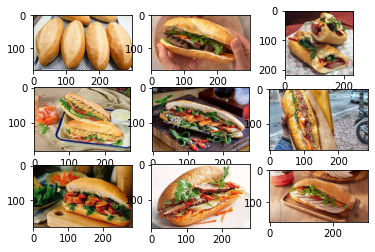

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
banhmi = '/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/banhmi/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = banhmi + 'banhmi' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

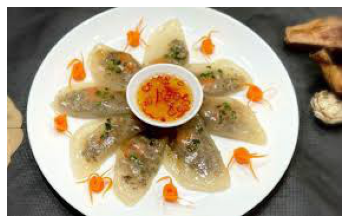

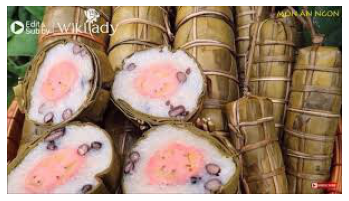

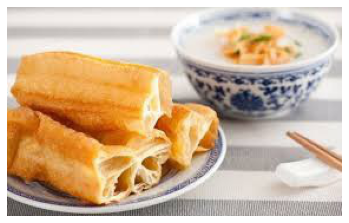

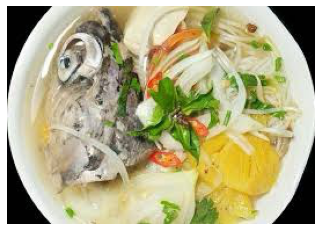

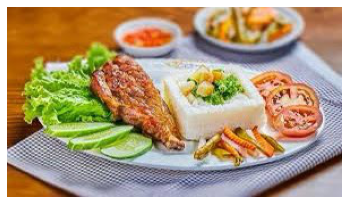

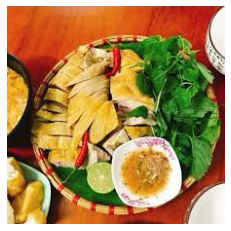

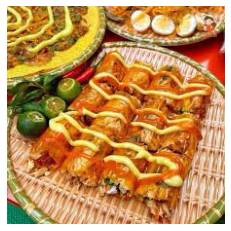

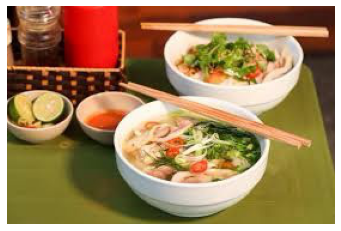

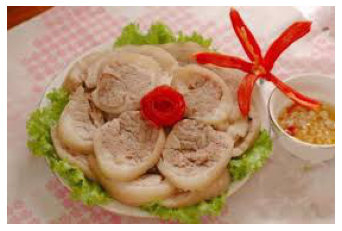

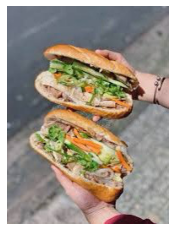

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 1

next_banhBL = [os.path.join(banhBL_dir, fname) 
                for fname in banhBL_files[pic_index-1:pic_index]]
next_banhtet = [os.path.join(banhtet_dir, fname) 
                for fname in banhtet_files[pic_index-1:pic_index]]
next_banhquay = [os.path.join(banhquay_dir, fname) 
                for fname in banhquay_files[pic_index-1:pic_index]]
next_banhmi = [os.path.join(banhmi_dir, fname) 
                for fname in banhmi_files[pic_index-1:pic_index]]
next_bun = [os.path.join(bun_dir, fname) 
                for fname in bun_files[pic_index-1:pic_index]]
next_com = [os.path.join(com_dir, fname) 
                for fname in com_files[pic_index-1:pic_index]]
next_gahapmuoi = [os.path.join(gahapmuoi_dir, fname) 
                for fname in gahapmuoi_files[pic_index-1:pic_index]] 
next_goicuon = [os.path.join(goicuon_dir, fname) 
                for fname in goicuon_files[pic_index-1:pic_index]]
next_pho = [os.path.join(pho_dir, fname) 
                for fname in pho_files[pic_index-1:pic_index]]
next_thitluoc = [os.path.join(thitluoc_dir, fname) 
                for fname in thitluoc_files[pic_index-1:pic_index]]

for i, img_path in enumerate(next_banhBL+next_banhtet+next_banhquay+next_bun+next_com+next_gahapmuoi+next_goicuon+next_pho+next_thitluoc+next_banhmi):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [23]:

training_datagen = ImageDataGenerator(
                                rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

train_generator = training_datagen.flow_from_directory(
	directory="/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/data/",
	target_size=(100,100),
	class_mode='categorical',
  subset='training',
  shuffle=True
  # batch_size=336
)

VALIDATION_DIR ="/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/test/"
# validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = training_datagen.flow_from_directory(
	directory="/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/test/",
	target_size=(100,100),
	class_mode='categorical',
  subset='validation',
  shuffle=True
  # batch_size=336
)

Found 503 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [26]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator



model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(503, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 49, 49, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 64)       

In [27]:
history = model.fit(train_generator,batch_size=10, epochs=50, validation_data = validation_generator, verbose = 0.5)


Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


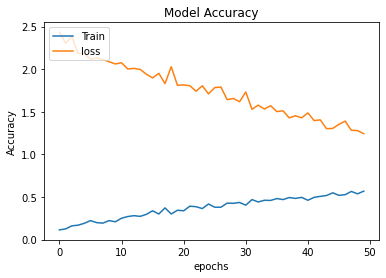

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','loss'],loc='upper left')
plt.show()

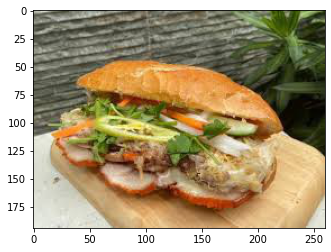

Day là bánh mì


In [34]:
filename = '/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/test/banhmi/1.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Đây là bánh bột lọc')
elif kq ==1:
  print('Day là bánh mì')
elif kq ==2:
  print('Day là bánh quẩy')
elif kq ==3:
  print('Day là bánh tét')
elif kq ==4:
  print('Day là bún')
elif kq ==5:
  print('Day là cơm')
elif kq ==6:
  print('Day là gà hấp muối')
elif kq ==7:
  print('Day là gỏi cuối')
elif kq ==8:
  print('Day là phở')
elif kq ==9:
  print('Day là thịt luộc')

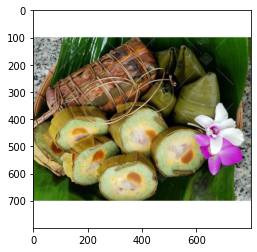

Day la bánh tét


In [32]:
filename = '/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/test/banhtet/2.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Đây là bánh bột lọc')
elif kq ==1:
  print('Đây là bánh mì')
elif kq ==2:
  print('đây là bánh quẩy')
elif kq ==3:
  print('đây là bánh tét')
elif kq ==4:
  print('đây là bún')
elif kq ==5:
  print('đây là cơm')
elif kq ==6:
  print('đây là gà hấp muối')
elif kq ==7:
  print('đây là gỏi cuối')
elif kq ==8:
  print('đây là phở')
elif kq ==9:
  print('đây là thịt luộc')

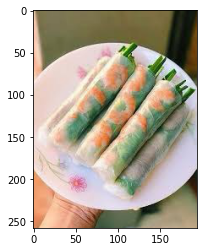

Day la gỏi cuối


In [33]:
filename = '/content/drive/MyDrive/Colab Notebooks/phanloai_DoAn/test/goicuon/1.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Đây là bánh bột lọc')
elif kq ==1:
  print('đây là bánh mì')
elif kq ==2:
  print('đây là bánh quẩy')
elif kq ==3:
  print('đây là bánh tét')
elif kq ==4:
  print('đây là bún')
elif kq ==5:
  print('đây là cơm')
elif kq ==6:
  print('đây là gà hấp muối')
elif kq ==7:
  print('đây là gỏi cuối')
elif kq ==8:
  print('đây là phở')
elif kq ==9:
  print('đây là thịt luộc')